## 简答题

1. Glorot初始化和He初始化为了解决什么问题
2. 是否可以将所有权重初始化为相同的值（只要该值是使用He初始化随机选择的）
3. 将偏置项初始化为0可以吗
4. 总结下讨论过的激活函数，并讲述在什么情况下使用它们
5. 如果在使用SGD优化器时将momentum超参数设置得太接近1（例如0.99999)会发生什么情况
6. 列举三种能产生稀疏模型得方法
7. dropout会减慢训练速度吗？它会减慢推理（即对新实例进行预测）速度吗？MC dropout呢？

## 编程题

在CIFAR10图像数据集上练习训练深度神经网络：

CIFAR-10数据集，又称加拿大高等研究院数据集（Canadian Institute for Advanced Research）是一个常用于训练机器学习和计算机视觉算法的图像集合。它是最广泛使用的机器学习研究数据集之一。

CIFAR-10数据集包含60,000张32×32像素的彩色图像，分为10个不同的类别。这10个类别分别是飞机、汽车、鸟类、猫、鹿、狗、青蛙、马、船和卡车，每个类别有6,000张图片。

飞机、汽车、鸟类、猫、鹿、狗、青蛙、马、船和卡车 对应的分类编码是0，1，2，3，4，5，6，7，8，9


1. 构建一个DNN，使其包含20个隐藏层，每个隐藏层包含100个神经元。使用He初始化和Swish激活函数。
2. 使用Nadam优化和早停技术，在CIFAR10数据集上训练网络。可以使用tf.keras.datasets.cifar10.load_data()加载数据。该数据集由10个类别的60000幅32×32像素的彩色图像（用于训练的50000个，用于测试的10000个）组成，因此需要一个具有10个神经元的softmax输出层。记住，每次更改模型的架构或超参数时，都要找寻正确的学习率。
3. 尝试添加批量归一化并比较学习曲线：收敛速度是否比以前快？会产生更好的模型吗？它如何影响训练速度？
4. 尝试用SELU替换批量归一化，并进行必要的调整以确保网络是自归一化的（即归一化输入特征，使用LeCun正态初始化，确保DNN仅仅包含一系列的密集层等）
5. 尝试使用Alpha dropout正则化模型。然后，在不重新训练模型的情况下，看看是否可以使用MC dropout获得更好的精度。
6. 使用1周期调度来重新训练模型，看看它是否可以提高训练速度和模型精度。

加载数据的代码： tf.keras.datasets.cifar10.load_data()

下载失败的解决方案：
1. 下载文件： cifar-10-python.tar.gz （会把文件发群里）
2. 将文件 cifar-10-python.tar.gz 重命名为 cifar-10-batches-py.tar.gz
3. 并复制到类似 C:\Users\某个用户名或者管理员\.keras\datasets 的路径。将 某个用户名或者管理员 替换为你的用户名。如果是 Linux/Macos 系统，则应为 /home/某个用户名或者管理员/.keras/datasets。

In [1]:
# 加载数据的代码
import tensorflow as tf
from IPython.core.pylabtools import activate_matplotlib

(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
# 查看数据集形状
print("训练集图片形状:", X_train_full.shape) # 应该是 (50000, 32, 32, 3)
print("训练集标签形状:", y_train_full.shape) # 应该是 (50000, 1)

训练集图片形状: (50000, 32, 32, 3)
训练集标签形状: (50000, 1)


In [2]:
# 按0-9顺序定义类别：飞机、汽车、鸟类、猫、鹿、狗、青蛙、马、船和卡车
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

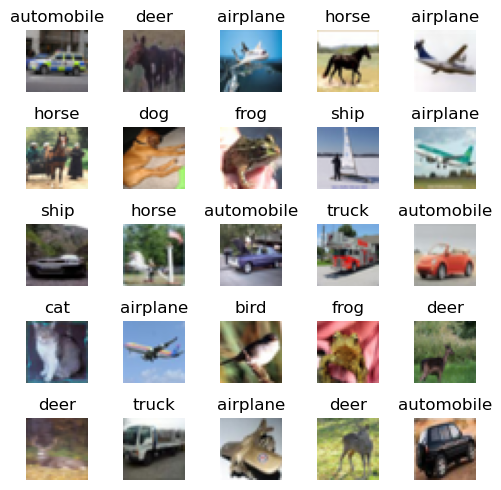

In [3]:
import numpy as np
import matplotlib.pyplot as plt

nrows = 5
ncols = 5

plt.figure(figsize=(5, 5))


random_indices = np.random.choice(len(X_train_full), nrows * ncols, replace=False)  # 无放回随机抽索引

for i, idx in enumerate(random_indices):
    plt.subplot(nrows, ncols, i+1)
    img = X_train_full[idx]
    label = y_train_full[idx, 0]
    plt.imshow(img)
    plt.title(class_names[label])
    plt.axis('off')

# 调整子图之间的间距，防止标题等重叠
plt.tight_layout()
plt.show()

In [4]:
np.random.seed(42)
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train_full,X_test = X_train_full / 255.0,X_test/ 255.0

# 划分验证集
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
y_train, y_valid, y_test = y_train.ravel(), y_valid.ravel(), y_test.ravel()
# 为 SELU 准备标准化数据
mean = np.mean(X_train, axis=(0, 1, 2), keepdims=True)
std = np.std(X_train, axis=(0, 1, 2), keepdims=True)
X_train_scaled = (X_train - mean) / std
X_valid_scaled = (X_valid - mean) / std
X_test_scaled = (X_test - mean) / std

In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

tf.random.set_seed(42)
np.random.seed(42)

# 加载并预处理数据
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()
X_train_full = X_train_full.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_train_full = X_train_full.reshape(X_train_full.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# 为SELU准备标准化数据
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [6]:
class LRFinder(keras.callbacks.Callback):
    def __init__(self, min_lr=1e-7, max_lr=1.0, steps_per_epoch=None, epochs=1, smooth=True, beta=0.98):
        super().__init__()
        self.min_lr = min_lr
        self.max_lr = max_lr
        self.total_steps = steps_per_epoch * epochs
        self.lrs = []
        self.losses = []
        self.step = 0
        self.smooth = smooth
        self.beta = beta
        self.avg_loss = 0

    def on_train_batch_begin(self, batch, logs=None):
        lr = self.min_lr * (self.max_lr / self.min_lr) ** (self.step / self.total_steps)
        keras.backend.set_value(self.model.optimizer.learning_rate, lr)
        self.lrs.append(lr)

    def on_train_batch_end(self, batch, logs=None):
        loss = logs.get("loss")
        if self.smooth and loss is not None:
            self.avg_loss = self.beta * self.avg_loss + (1 - self.beta) * loss
            smoothed_loss = self.avg_loss / (1 - self.beta ** (self.step + 1))
            self.losses.append(smoothed_loss)
        else:
            self.losses.append(loss)

        self.step += 1
        if self.step >= self.total_steps:
            self.model.stop_training = True


    def get_best_lr(self, fraction=0.1, min_lr_bound=1e-5, max_lr_bound=1e-1, task_type="vision"):
        """
        智能选择最佳学习率：
        - 动态缩放因子：最陡点越小，缩放越少（避免过度缩小）
        - 任务感知默认值：vision / nlp / tabular
        - 多重安全兜底
        """
        if len(self.losses) < 10:
            default_lr = {"vision": 3e-4, "nlp": 5e-5, "tabular": 1e-3}.get(task_type, 3e-4)
            print(f"⚠️  数据点不足，回退到任务默认学习率: {default_lr:.2e}")
            return default_lr

        losses = np.array(self.losses)
        lrs = np.array(self.lrs)

        # 平滑损失
        from scipy.signal import savgol_filter
        try:
            window = min(11, len(losses) // 2 * 2 - 1)
            if window < 5: window = 5
            losses_smooth = savgol_filter(losses, window, 3)
        except:
            losses_smooth = losses

        # 计算梯度
        gradients = np.gradient(losses_smooth, lrs)

        min_loss_idx = np.argmin(losses_smooth)
        min_loss = losses_smooth[min_loss_idx]
        initial_loss = losses_smooth[0]

        # 定义有效下降区域
        valid_mask = (
            (gradients < 0) &
            (losses_smooth < initial_loss * 0.9) &
            (lrs > 1e-6) &  # 不限制下界，让算法自由找
            (lrs < max_lr_bound)
        )

        if not np.any(valid_mask):
            valid_mask = (gradients < 0) & (lrs > 1e-6) & (lrs < max_lr_bound)
            if not np.any(valid_mask):
                # 回退到最小损失点
                best_lr = lrs[min_loss_idx]
                print(f"⚠️  未找到有效下降区域，回退到最小损失点: {best_lr:.2e}")

                # 根据任务设置合理缩放
                task_scale = {"vision": 0.3, "nlp": 0.1, "tabular": 0.5}.get(task_type, 0.3)
                final_lr = best_lr * task_scale
                final_lr = max(final_lr, {"vision": 1e-4, "nlp": 5e-5, "tabular": 5e-4}.get(task_type, 1e-4))
                final_lr = min(final_lr, max_lr_bound)
                return final_lr

        # 找最陡点
        valid_gradients = gradients[valid_mask]
        valid_lrs = lrs[valid_mask]
        best_idx_in_valid = np.argmin(valid_gradients)
        best_lr = valid_lrs[best_idx_in_valid]

        # ✅ 智能缩放：最陡点越小，缩放比例越大（避免过度缩小）
        if best_lr < 1e-4:
            dynamic_fraction = 0.3  # 小学习率区，只缩放30%
        elif best_lr < 1e-3:
            dynamic_fraction = 0.2
        else:
            dynamic_fraction = 0.1  # 大学习率区，保守缩放

        final_lr = best_lr * dynamic_fraction

        # ✅ 任务自适应最小边界
        task_min_lr = {"vision": 1e-4, "nlp": 5e-5, "tabular": 5e-4}.get(task_type, 1e-4)
        final_lr = max(final_lr, task_min_lr)
        final_lr = min(final_lr, max_lr_bound)

        print(f"📉 最陡下降点 @ lr={best_lr:.2e}，动态缩放×{dynamic_fraction:.1f} → {final_lr:.2e}")
        return final_lr

    def plot(self):
        plt.figure(figsize=(10, 6))
        plt.semilogx(self.lrs, self.losses, '-o', markersize=3)
        plt.xlabel("Learning Rate")
        plt.ylabel("Loss")
        plt.grid(True, which="both")
        plt.title("Learning Rate Range Test (Smoothed)")
        plt.show()

In [7]:
def create_dnn_model(use_batch_norm=False, activation='swish', use_selu=False, dropout_rate=0.0, alpha_dropout=False):
    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape=(3072,)))

    for i in range(20):
        if use_selu:
            model.add(keras.layers.Dense(100,
                                         kernel_initializer='lecun_normal',
                                         activation='selu'))
            if alpha_dropout and dropout_rate > 0:
                model.add(keras.layers.AlphaDropout(dropout_rate))
        else:
            model.add(keras.layers.Dense(100,
                                         kernel_initializer='he_normal',
                                         activation=activation))
            if use_batch_norm:
                model.add(keras.layers.BatchNormalization())
            if dropout_rate > 0 and not alpha_dropout:
                model.add(keras.layers.Dropout(dropout_rate))

    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [8]:
def find_best_lr_for_model(model_fn, X, y, batch_size=32, min_lr=1e-7, max_lr=1e-1, task_type="vision"):
    model = model_fn()
    model.compile(optimizer=keras.optimizers.Nadam(), loss='sparse_categorical_crossentropy')

    steps_per_epoch = len(X) // batch_size
    lr_finder = LRFinder(min_lr=min_lr, max_lr=max_lr, steps_per_epoch=steps_per_epoch, epochs=1)

    print("正在进行学习率范围测试...")
    model.fit(X, y, batch_size=batch_size, epochs=1, callbacks=[lr_finder], verbose=0)

    # ✅ 智能选择
    best_lr = lr_finder.get_best_lr(task_type=task_type)

    # 💥 最终兜底：确保不会太小
    absolute_min = 5e-5
    if best_lr < absolute_min:
        print(f"🚨 学习率 {best_lr:.2e} 低于绝对最小值 {absolute_min:.1e}，强制修正")
        best_lr = absolute_min

    print(f"✅ 最终选定学习率: {best_lr:.2e}")
    lr_finder.plot()

    return best_lr


=== 基础DNN（He + Swish）===
正在进行学习率范围测试...
📉 最陡下降点 @ lr=3.56e-02，动态缩放×0.1 → 3.56e-03
✅ 最终选定学习率: 3.56e-03


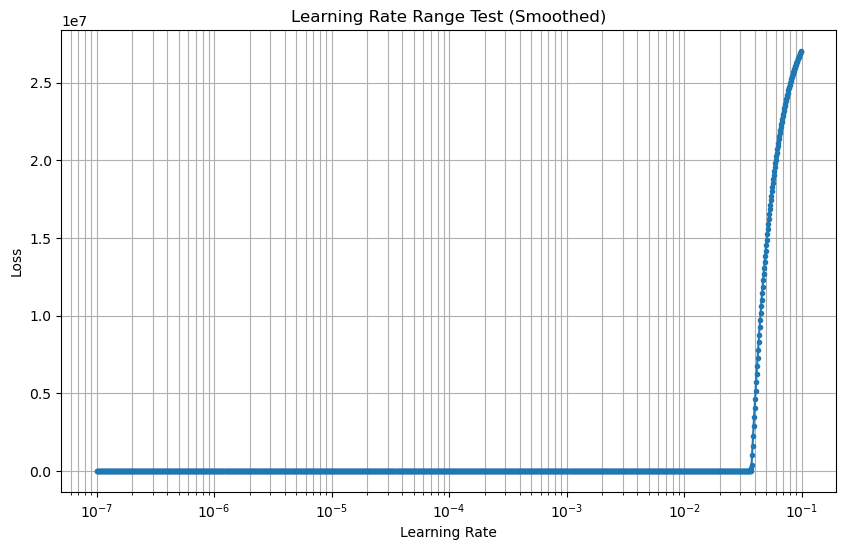


=== BatchNorm模型 ===
正在进行学习率范围测试...
📉 最陡下降点 @ lr=1.10e-06，动态缩放×0.3 → 1.00e-04
✅ 最终选定学习率: 1.00e-04


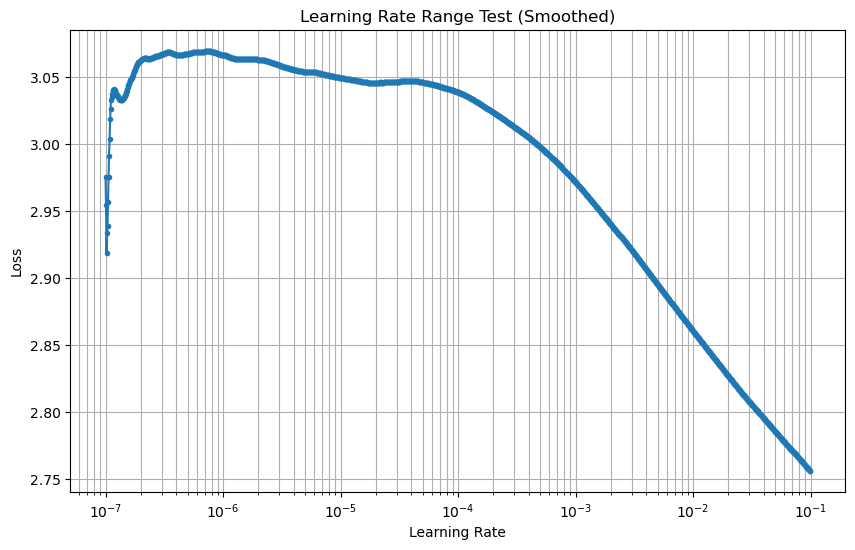


=== SELU自归一化模型 ===
正在进行学习率范围测试...
📉 最陡下降点 @ lr=1.66e-02，动态缩放×0.1 → 1.66e-03
✅ 最终选定学习率: 1.66e-03


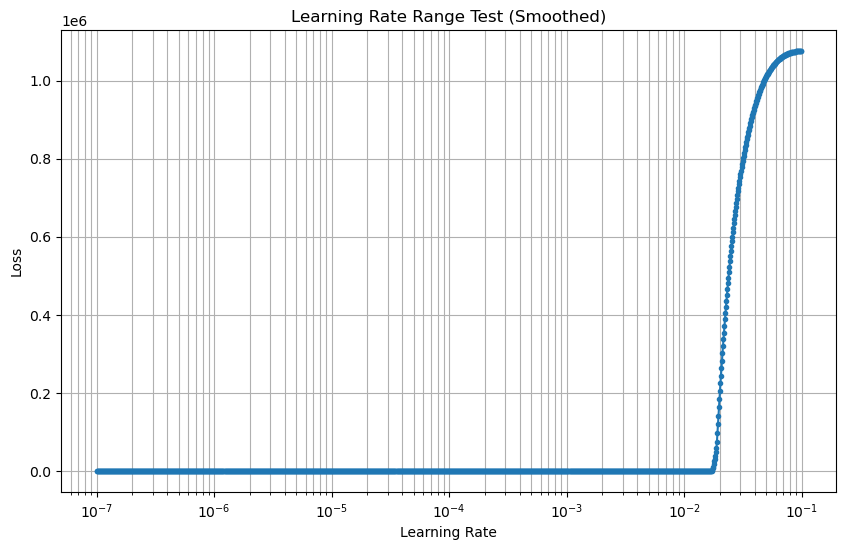


=== Alpha Dropout模型 ===
正在进行学习率范围测试...
📉 最陡下降点 @ lr=3.26e-02，动态缩放×0.1 → 3.26e-03
✅ 最终选定学习率: 3.26e-03


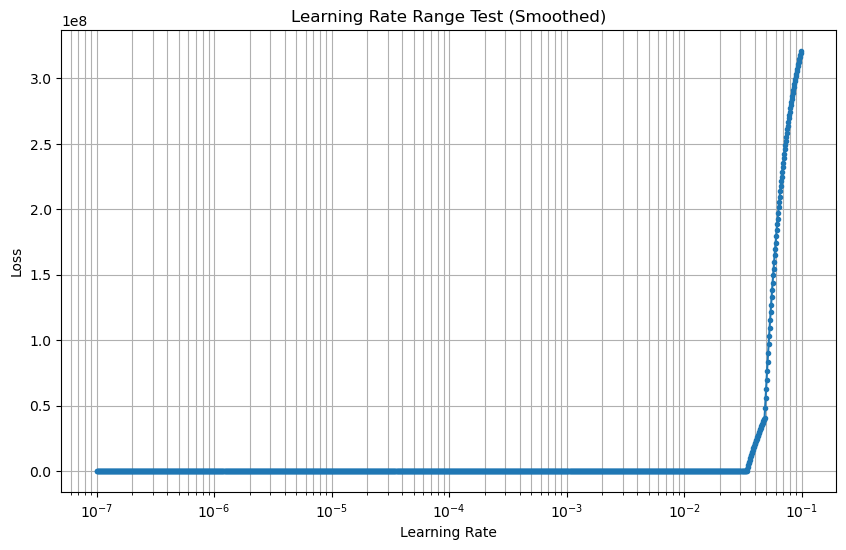


=== 1Cycle 最大学习率 ===
📉 最陡下降点 @ lr=1.19e-02，动态缩放×0.1 → 1.19e-03
✅ 1Cycle 最大学习率: 1.19e-03


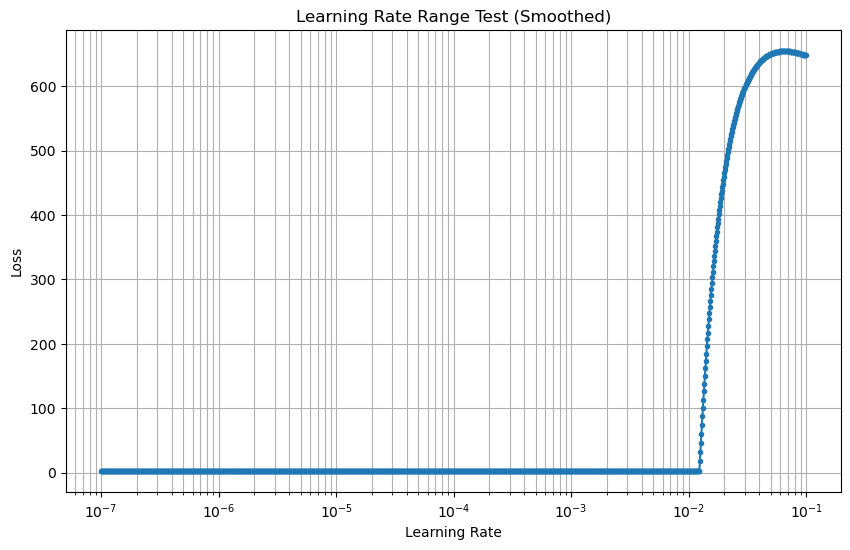

In [9]:
# 1. 基础模型
print("\n=== 基础DNN（He + Swish）===")
LR_BASIC = find_best_lr_for_model(
    lambda: create_dnn_model(),
    X_train, y_train
)

# 2. BatchNorm模型
print("\n=== BatchNorm模型 ===")
LR_BN = find_best_lr_for_model(
    lambda: create_dnn_model(use_batch_norm=True),
    X_train, y_train
)

# 3. SELU模型（使用标准化数据）
print("\n=== SELU自归一化模型 ===")
LR_SELU = find_best_lr_for_model(
    lambda: create_dnn_model(use_selu=True),
    X_train_scaled, y_train
)

# 4. Alpha Dropout模型
print("\n=== Alpha Dropout模型 ===")
LR_ALPHA = find_best_lr_for_model(
    lambda: create_dnn_model(use_selu=True, dropout_rate=0.1, alpha_dropout=True),
    X_train_scaled, y_train
)

# 5. 1Cycle 需要最大学习率（我们取转折点 × 1，不 ×0.1）
print("\n=== 1Cycle 最大学习率 ===")
model_1c = create_dnn_model()
model_1c.compile(optimizer=keras.optimizers.Nadam(), loss='sparse_categorical_crossentropy')
lr_finder_1c = LRFinder(min_lr=1e-7, max_lr=1e-1, steps_per_epoch=len(X_train)//32, epochs=1)
model_1c.fit(X_train, y_train, batch_size=32, epochs=1, callbacks=[lr_finder_1c], verbose=0)
LR_MAX_1CYCLE = lr_finder_1c.get_best_lr(fraction=1.0)  # 不缩小，直接用最陡点
print(f"✅ 1Cycle 最大学习率: {LR_MAX_1CYCLE:.2e}")
lr_finder_1c.plot()

In [10]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, lr_max, steps, mom_min=0.85, mom_max=0.95, phase_ratio=0.3, div_factor=25., final_div_factor=1e4):
        """
        OneCycle 学习率调度器

        参数:
            lr_max: 峰值学习率（通常来自LR Range Test的最陡点）
            steps: 总训练步数（epochs * steps_per_epoch）
            mom_min: 最小动量（默认0.85）
            mom_max: 最大动量（默认0.95）
            phase_ratio: 上升阶段占总步数的比例（默认0.3 → 30%上升，70%下降）
            div_factor: 初始学习率 = lr_max / div_factor（默认25 → 起点是峰值的1/25）
            final_div_factor: 最终学习率 = lr_max / final_div_factor（默认1e4 → 结束是峰值的1/10000）
        """
        super().__init__()
        self.lr_max = lr_max
        self.steps = steps
        self.mom_min = mom_min
        self.mom_max = mom_max
        self.phase_steps = int(steps * phase_ratio)
        self.div_factor = div_factor
        self.final_div_factor = final_div_factor

        # 预计算所有步的学习率和动量（提高效率）
        self.lrs = []
        self.moms = []

        # 第一阶段：上升
        for i in range(self.phase_steps):
            prog = i / self.phase_steps
            lr = self.lr_max / self.div_factor + (self.lr_max - self.lr_max / self.div_factor) * prog
            mom = self.mom_max - (self.mom_max - self.mom_min) * prog
            self.lrs.append(lr)
            self.moms.append(mom)

        # 第二阶段：下降
        for i in range(self.phase_steps, steps):
            prog = (i - self.phase_steps) / (steps - self.phase_steps)
            lr = self.lr_max - (self.lr_max - self.lr_max / self.final_div_factor) * prog
            mom = self.mom_min + (self.mom_max - self.mom_min) * prog
            self.lrs.append(lr)
            self.moms.append(mom)

    def on_train_batch_begin(self, batch, logs=None):
        if len(self.lrs) > self.step:
            lr = self.lrs[self.step]
            keras.backend.set_value(self.model.optimizer.learning_rate, lr)

            # 如果优化器支持动量，也调整动量（适用于SGD、Nadam等）
            if hasattr(self.model.optimizer, 'momentum') and self.moms:
                keras.backend.set_value(self.model.optimizer.momentum, self.moms[self.step])
            elif hasattr(self.model.optimizer, 'beta_1') and self.moms:  # Nadam, Adam
                keras.backend.set_value(self.model.optimizer.beta_1, self.moms[self.step])

            self.step += 1

    def on_train_begin(self, logs=None):
        self.step = 0

    def plot(self):
        """可视化学习率和动量变化"""
        fig, ax1 = plt.subplots(figsize=(12, 5))

        ax1.plot(range(len(self.lrs)), self.lrs, 'b-', label='Learning Rate')
        ax1.set_xlabel('Step')
        ax1.set_ylabel('Learning Rate', color='b')
        ax1.tick_params(axis='y', labelcolor='b')
        ax1.grid(True)

        ax2 = ax1.twinx()
        ax2.plot(range(len(self.moms)), self.moms, 'r--', label='Momentum/Beta1')
        ax2.set_ylabel('Momentum / Beta1', color='r')
        ax2.tick_params(axis='y', labelcolor='r')

        plt.title('OneCycle Scheduler: LR & Momentum Schedule')
        fig.tight_layout()
        plt.show()

In [11]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

results = {}

# 1. 基础模型
model_basic = create_dnn_model()
model_basic.compile(optimizer=keras.optimizers.Nadam(learning_rate=LR_BASIC),
                    loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_basic = model_basic.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid),
                                callbacks=[early_stopping], verbose=1)
test_loss, test_acc = model_basic.evaluate(X_test, y_test, verbose=0)
results["Basic"] = test_acc

# 2. BatchNorm
model_bn = create_dnn_model(use_batch_norm=True)
model_bn.compile(optimizer=keras.optimizers.Nadam(learning_rate=LR_BN),
                 loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_bn = model_bn.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid),
                          callbacks=[early_stopping], verbose=1)
test_loss, test_acc = model_bn.evaluate(X_test, y_test, verbose=0)
results["BatchNorm"] = test_acc

# 3. SELU
model_selu = create_dnn_model(use_selu=True)
model_selu.compile(optimizer=keras.optimizers.Nadam(learning_rate=LR_SELU),
                   loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_selu = model_selu.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_valid_scaled, y_valid),
                              callbacks=[early_stopping], verbose=1)
test_loss, test_acc = model_selu.evaluate(X_test_scaled, y_test, verbose=0)
results["SELU"] = test_acc

# 4. Alpha Dropout
model_alpha = create_dnn_model(use_selu=True, dropout_rate=0.1, alpha_dropout=True)
model_alpha.compile(optimizer=keras.optimizers.Nadam(learning_rate=LR_ALPHA),
                    loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_alpha = model_alpha.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_valid_scaled, y_valid),
                                callbacks=[early_stopping], verbose=1)
test_loss, test_acc = model_alpha.evaluate(X_test_scaled, y_test, verbose=0)
results["Alpha Dropout"] = test_acc

# 5. 1Cycle
model_1cycle = create_dnn_model()
model_1cycle.compile(optimizer=keras.optimizers.Nadam(learning_rate=LR_MAX_1CYCLE/10),
                     loss='sparse_categorical_crossentropy', metrics=['accuracy'])

steps_per_epoch = len(X_train) // 32
total_steps = steps_per_epoch * 20
one_cycle =  OneCycleScheduler(lr_max=LR_MAX_1CYCLE, steps=total_steps)

history_1cycle = model_1cycle.fit(X_train, y_train, epochs=20, batch_size=32,
                                  validation_data=(X_valid, y_valid),
                                  callbacks=[one_cycle, early_stopping], verbose=1)
test_loss, test_acc = model_1cycle.evaluate(X_test, y_test, verbose=0)
results["1Cycle"] = test_acc

Epoch 1/100
1407/1407 [==============================] - 20s 10ms/step - loss: 2.1220 - accuracy: 0.1957 - val_loss: 1.9513 - val_accuracy: 0.2572
Epoch 2/100
1407/1407 [==============================] - 14s 10ms/step - loss: 2.0186 - accuracy: 0.2215 - val_loss: 1.9844 - val_accuracy: 0.2304
Epoch 3/100
1407/1407 [==============================] - 14s 10ms/step - loss: 2.0067 - accuracy: 0.2251 - val_loss: 1.9977 - val_accuracy: 0.2250
Epoch 4/100
1407/1407 [==============================] - 14s 10ms/step - loss: 2.0135 - accuracy: 0.2147 - val_loss: 2.1029 - val_accuracy: 0.1878
Epoch 5/100
1407/1407 [==============================] - 14s 10ms/step - loss: 2.0058 - accuracy: 0.2188 - val_loss: 2.0094 - val_accuracy: 0.2080
Epoch 6/100
1407/1407 [==============================] - 16s 11ms/step - loss: 1.9979 - accuracy: 0.2190 - val_loss: 1.9974 - val_accuracy: 0.2084
Epoch 7/100
1407/1407 [==============================] - 14s 10ms/step - loss: 1.9832 - accuracy: 0.2252 - val_loss: 2

KeyboardInterrupt: 

In [ ]:
print("\n" + "="*50)
print("📊 最终测试准确率对比（自动选择学习率）")
print("="*50)
for name, acc in results.items():
    print(f"{name:<15}: {acc:.4f}")